In [34]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
# Suppress warnings
warnings.filterwarnings("ignore")

In [35]:
# Load the data from the Excel file
file_path = 'D:\\CubeAI Internship\\Task-7 Youtube Analysis\\Global YouTube Statistics.csv'

# Try reading the file with different encodings
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read the file with encoding: {encoding}")


Failed to read the file with encoding: utf-8
Successfully read the file with encoding: latin1


In [36]:

# Display initial data
print("Initial Data:\n", df.head())

Initial Data:
    rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1

Data Cleaning

In [37]:
# Replace 'nan' string with actual NaN values
df.replace('nan', np.nan, inplace=True)

# Fill NaN values in numerical columns with 0 or an appropriate value
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical_columns] = df[numerical_columns].fillna(0)

# Combine year, month, and date columns into a single datetime column
df['created_date'] = pd.to_datetime(df[['created_date', 'created_month', 'created_year']].astype(str).agg('-'.join, axis=1), errors='coerce')


In [38]:
# Drop individual year, month, and date columns
df = df.drop(columns=['created_year', 'created_month', 'created_date'])

# Strip whitespaces from text columns
text_columns = df.select_dtypes(include=[object]).columns.tolist()
df[text_columns] = df[text_columns].apply(lambda x: x.str.strip())

# Remove special characters from 'Youtuber' column
df['Youtuber'] = df['Youtuber'].str.replace('ýýý', '')

# Convert text columns to lowercase for consistency
df[text_columns] = df[text_columns].apply(lambda x: x.str.lower())

# Remove duplicate rows
df = df.drop_duplicates()

In [39]:
# Replace null values in 'category' with 'Other'
df['category'].fillna('Other', inplace=True)

# Replace null values in 'Country' and 'Abbreviation' with 'Not Available' and 'NA' respectively
df['Country'].fillna('Not Available', inplace=True)
df['Abbreviation'].fillna('NA', inplace=True)

# Replace null values in 'channel_type' with 'Unknown Type'
df['channel_type'].fillna('Unknown Type', inplace=True)

# Print null values
print("Null Values:\n", df.isnull().sum())





Null Values:
 rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
Gross tertiary education enrollment (%)    0
Population                                 0
Unemployment rate                        

In [62]:
# Save the cleaned DataFrame to a CSV file
cleaned_file_path = 'cleaned_youtube_data.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned DataFrame saved to {cleaned_file_path}")

Cleaned DataFrame saved to cleaned_youtube_data.csv


In [40]:
df.describe(include="all")

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,995,9.950000e+02,9.950000e+02,995,995,995.000000,995,995,995,...,9.950000e+02,9.950000e+02,9.950000e+02,9.950000e+02,995.000000,9.950000e+02,995.000000,9.950000e+02,995.000000,995.000000
unique,NaN,988,NaN,NaN,19,992,NaN,50,50,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,,NaN,NaN,entertainment,preston,NaN,united states,us,entertainment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,241,2,NaN,313,313,304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,498.00000,NaN,2.298241e+07,1.103954e+10,NaN,NaN,9187.125628,NaN,NaN,NaN,...,5.898078e+05,4.422574e+05,7.081814e+06,2.308483e+05,55.762211,3.771836e+08,8.132191,1.964980e+08,23.340489,-12.381652
std,287.37606,NaN,1.752611e+07,1.411084e+10,NaN,NaN,34151.352254,NaN,NaN,NaN,...,1.148622e+06,8.612161e+05,1.379704e+07,5.261092e+05,32.191178,4.647169e+08,5.502432,1.625394e+08,21.150562,79.479723
min,1.00000,NaN,1.230000e+07,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,-38.416097,-172.104629
25%,249.50000,NaN,1.450000e+07,4.288145e+09,NaN,NaN,194.500000,NaN,NaN,NaN,...,4.350000e+04,3.265000e+04,5.217500e+05,0.000000e+00,28.100000,5.033944e+07,3.850000,4.082730e+07,4.570868,-95.712891
50%,498.00000,NaN,1.770000e+07,7.760820e+09,NaN,NaN,729.000000,NaN,NaN,NaN,...,2.127000e+05,1.595000e+05,2.600000e+06,1.000000e+05,60.000000,2.702039e+08,5.360000,1.832416e+08,23.634501,-3.435973
75%,746.50000,NaN,2.460000e+07,1.355470e+10,NaN,NaN,2667.500000,NaN,NaN,NaN,...,6.068000e+05,4.551000e+05,7.300000e+06,2.000000e+05,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880


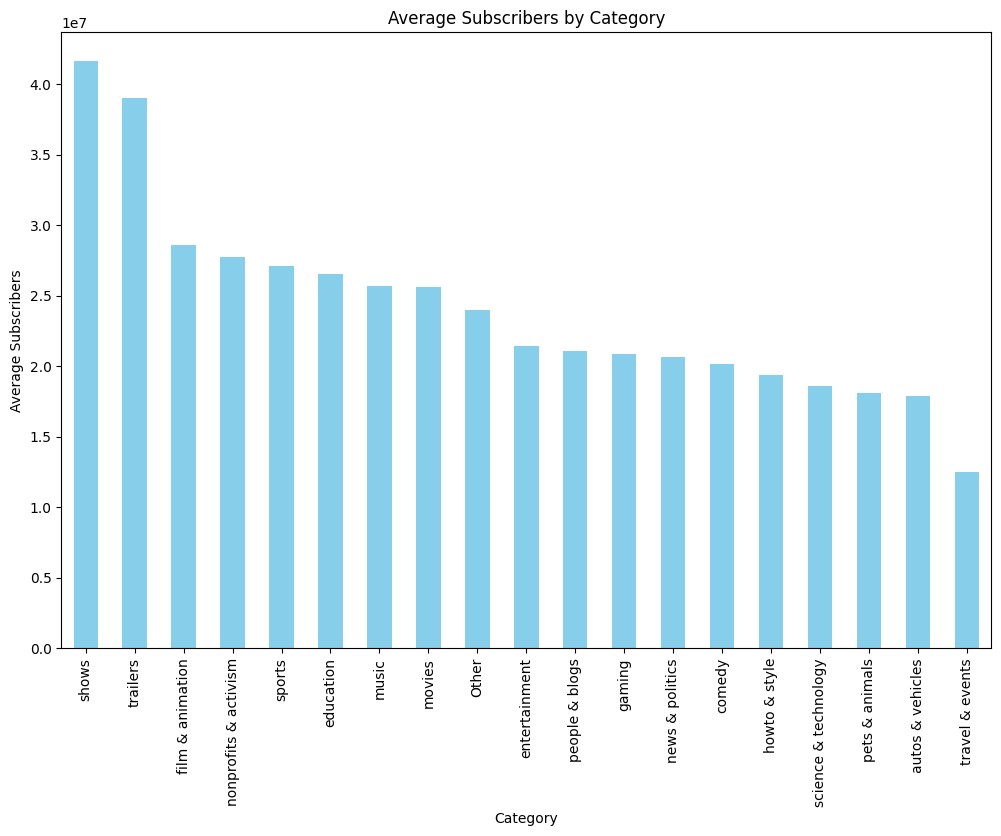

In [61]:
# Average Subscribers by Category
avg_subscribers_by_category = df.groupby('category')['subscribers'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_subscribers_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Subscribers by Category')
plt.xlabel('Category')
plt.ylabel('Average Subscribers')
plt.xticks(rotation=90)
plt.show()


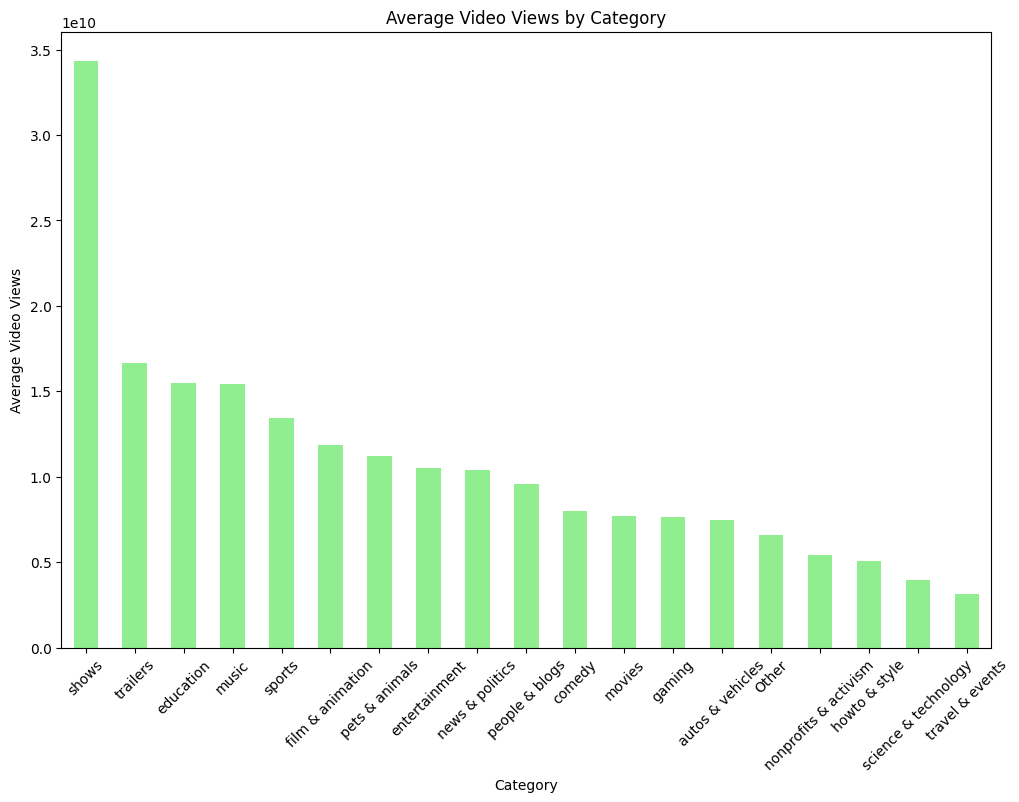

In [44]:
# Average Video Views by Category
avg_views_by_category = df.groupby('category')['video views'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_views_by_category.plot(kind='bar', color='lightgreen')
plt.title('Average Video Views by Category')
plt.xlabel('Category')
plt.ylabel('Average Video Views')
plt.xticks(rotation=45)
plt.show()

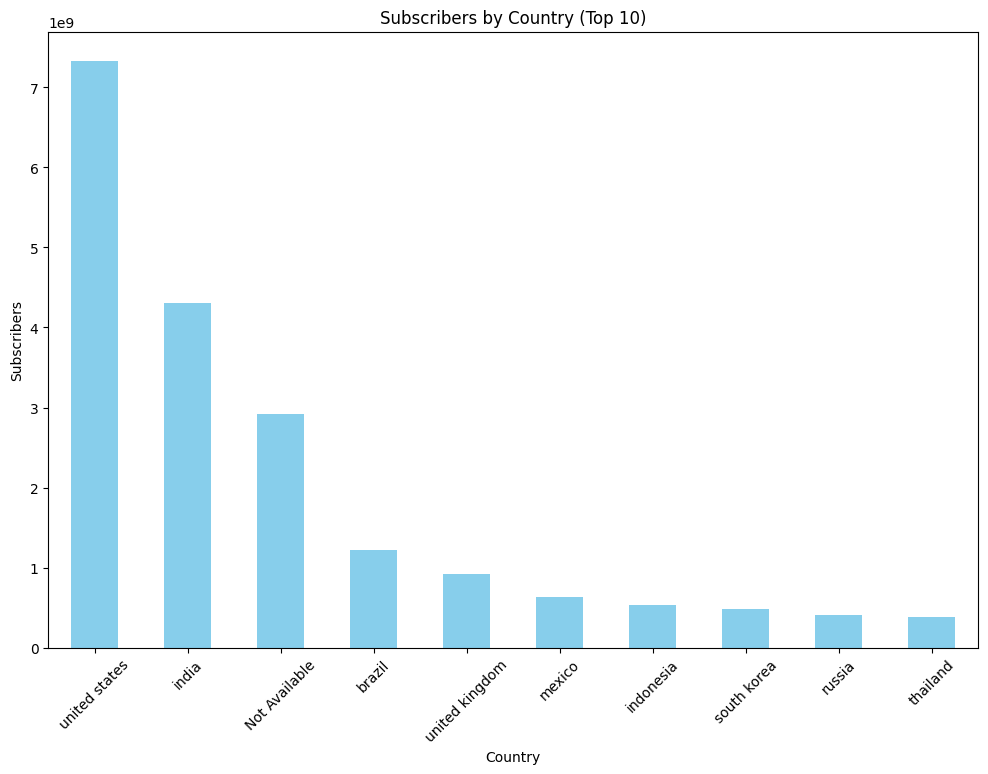

In [50]:
# subscribers by country
top_countries_by_subscribers = df.groupby('Country')['subscribers'].sum().nlargest(10)
plt.figure(figsize=(12, 8))
top_countries_by_subscribers.plot(kind='bar', color='skyblue')
plt.title('Subscribers by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Subscribers')
plt.xticks(rotation=45)
plt.show()

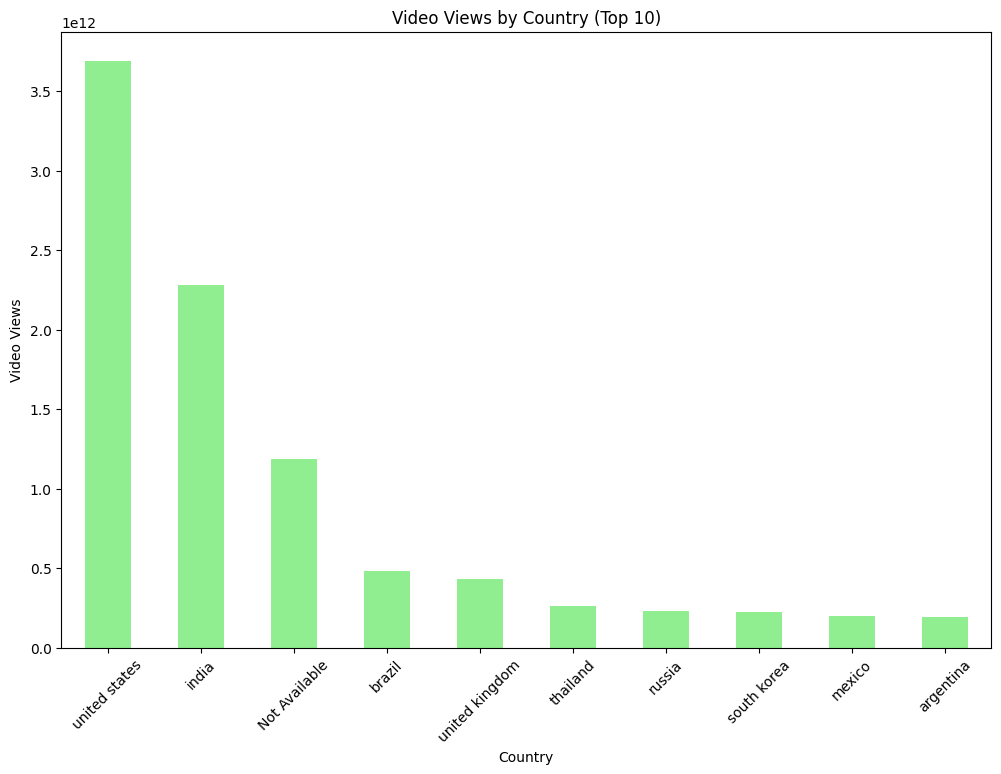

In [51]:
# video views by country
top_countries_by_views = df.groupby('Country')['video views'].sum().nlargest(10)
plt.figure(figsize=(12, 8))
top_countries_by_views.plot(kind='bar', color='lightgreen')
plt.title('Video Views by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Video Views')
plt.xticks(rotation=45)
plt.show()

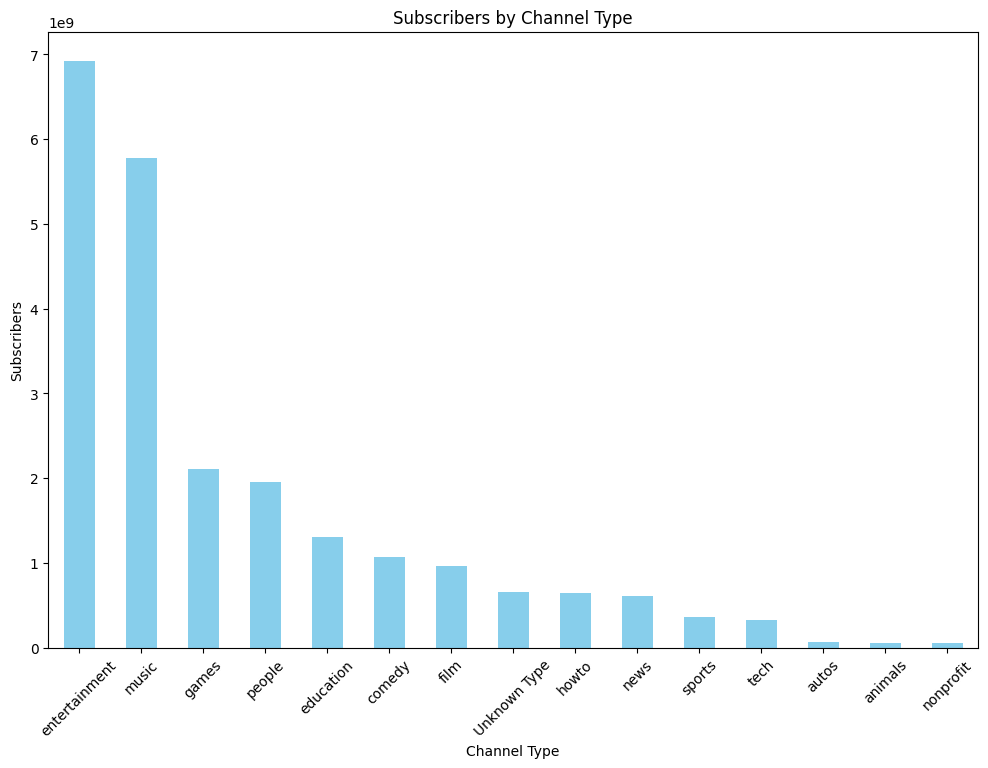

In [52]:
# subscribers by channel type
subscribers_by_channel_type = df.groupby('channel_type')['subscribers'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
subscribers_by_channel_type.plot(kind='bar', color='skyblue')
plt.title('Subscribers by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Subscribers')
plt.xticks(rotation=45)
plt.show()

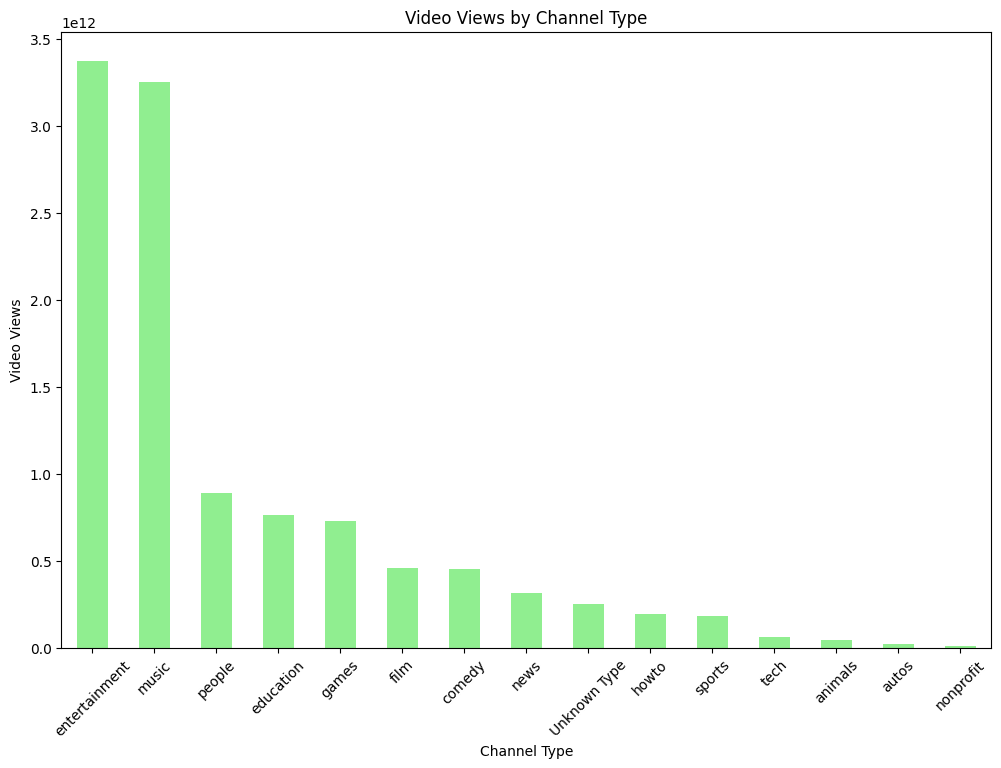

In [53]:
# video views by channel type
views_by_channel_type = df.groupby('channel_type')['video views'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
views_by_channel_type.plot(kind='bar', color='lightgreen')
plt.title('Video Views by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Video Views')
plt.xticks(rotation=45)
plt.show()


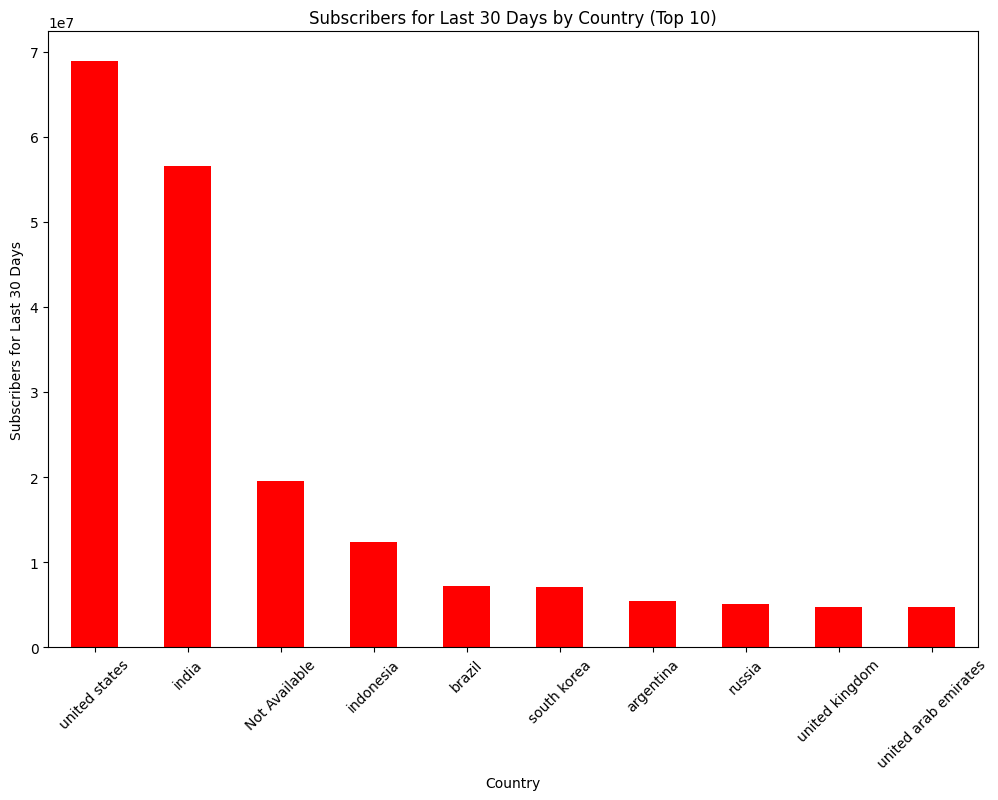

In [63]:
# subscribers for last 30 days by country
subscribers_30days_by_country = df.groupby('Country')['subscribers_for_last_30_days'].sum().nlargest(10)
plt.figure(figsize=(12, 8))
subscribers_30days_by_country.plot(kind='bar', color='red')
plt.title('Subscribers for Last 30 Days by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Subscribers for Last 30 Days')
plt.xticks(rotation=45)
plt.show()

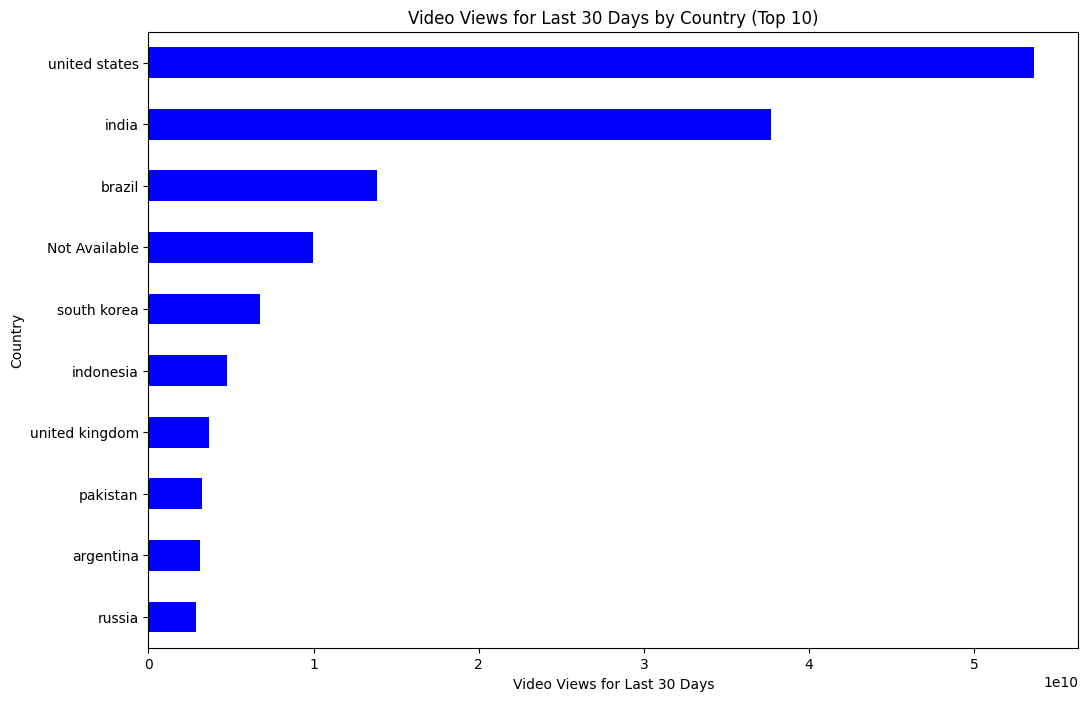

In [67]:
#Video views_30days_by_country
views_30days_by_country = df.groupby('Country')['video_views_for_the_last_30_days'].sum().nlargest(10).sort_values(ascending=True)
plt.figure(figsize=(12, 8))
views_30days_by_country.plot(kind='barh', color='blue')
plt.title('Video Views for Last 30 Days by Country (Top 10)')
plt.xlabel('Video Views for Last 30 Days')
plt.ylabel('Country')
plt.xticks(rotation=0)
plt.show()

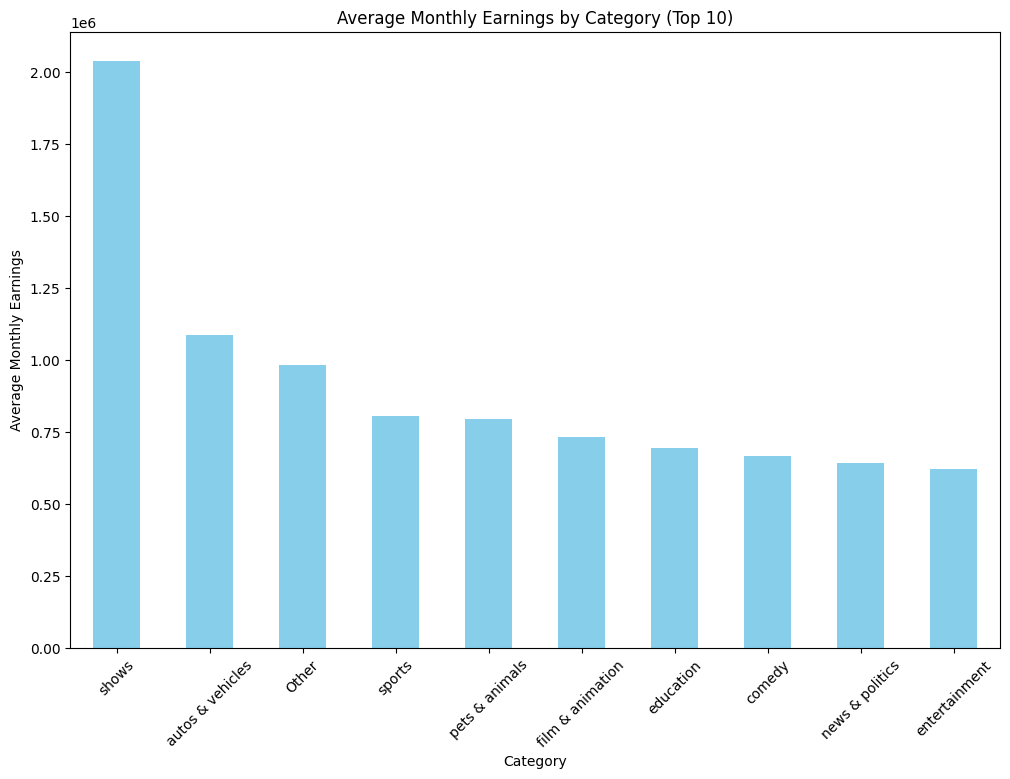

In [56]:
# average monthly earnings by category
avg_monthly_earnings_by_category = df.groupby('category')['highest_monthly_earnings'].mean().nlargest(10)
plt.figure(figsize=(12, 8))
avg_monthly_earnings_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Earnings by Category (Top 10)')
plt.xlabel('Category')
plt.ylabel('Average Monthly Earnings')
plt.xticks(rotation=45)
plt.show()


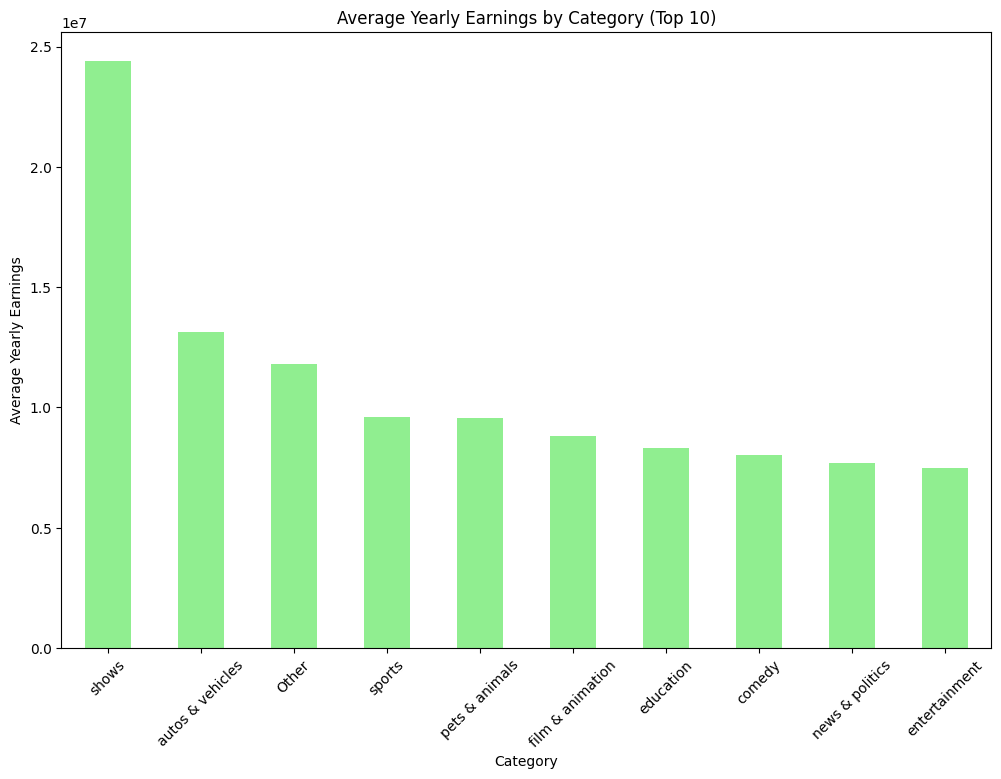

In [57]:
# average yearly earnings by category
avg_yearly_earnings_by_category = df.groupby('category')['highest_yearly_earnings'].mean().nlargest(10)
plt.figure(figsize=(12, 8))
avg_yearly_earnings_by_category.plot(kind='bar', color='lightgreen')
plt.title('Average Yearly Earnings by Category (Top 10)')
plt.xlabel('Category')
plt.ylabel('Average Yearly Earnings')
plt.xticks(rotation=45)
plt.show()

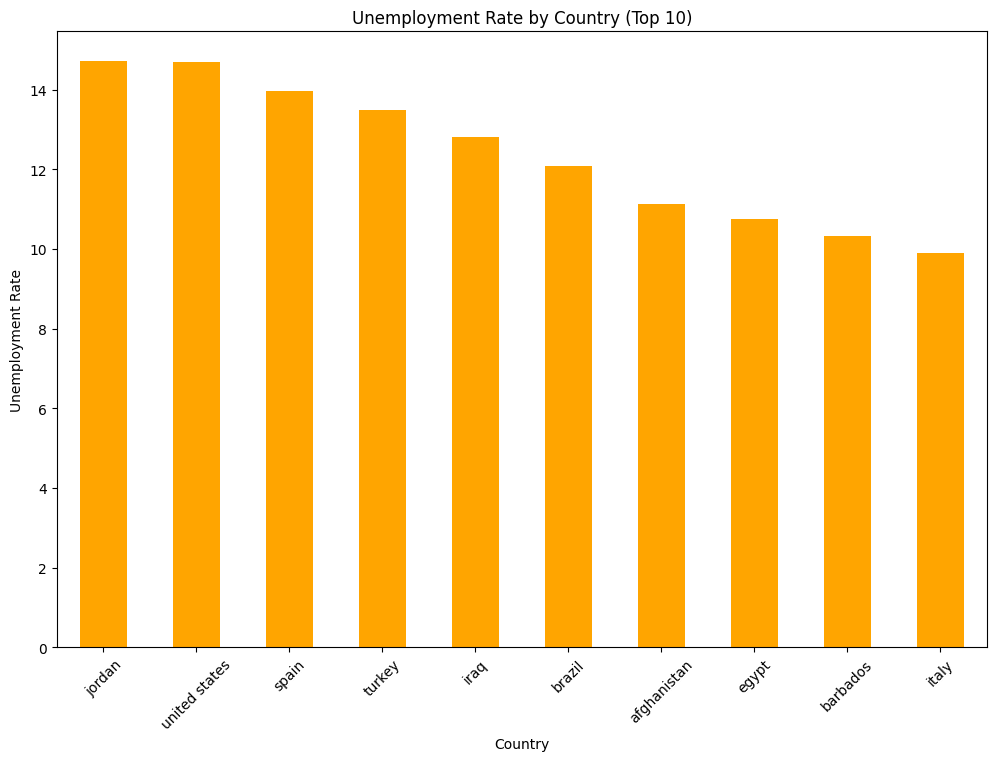

In [58]:
# unemployment rate by country
unemployment_rate_by_country = df.groupby('Country')['Unemployment rate'].mean().nlargest(10)
plt.figure(figsize=(12, 8))
unemployment_rate_by_country.plot(kind='bar', color='orange')
plt.title('Unemployment Rate by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()